In [1]:
import pandas as pd

In [2]:
bikes = pd.read_csv("Data/Bikes_Clean.csv")
weather = pd.read_csv("Data/Weather_Clean.csv")
holidays = pd.read_csv("Data/Holidays_Clean.csv")

In [3]:
data = bikes.merge(holidays, how="left", left_on="Date", right_on="Date")
data = data.merge(weather, how="left", left_on="Date", right_on="Date")

In [4]:
data.loc[pd.notnull(data["Holiday"]), "Holiday"] = 1
data.loc[pd.isnull(data["Holiday"]), "Holiday"] = 0

In [5]:
data = data.dropna(axis=0, how="any")

In [6]:
data.head()

,Date,Trips,Holiday,PRCP,SNOW,TMAX,TMIN,TAVG,AWND
0,2015-01-01,2611.0,1,0.0,0.0,8.3,-2.7,1.7,3.7
1,2015-01-02,5155.0,0,0.0,0.0,9.4,1.7,5.3,1.3
2,2015-01-03,1718.0,0,12.7,0.0,5.6,1.1,4.0,1.5
4,2015-01-05,5262.0,0,0.0,0.0,11.1,-1.6,7.8,6.4
5,2015-01-06,2086.0,0,5.1,61.0,0.0,-4.3,-1.9,2.2


In [7]:
data.describe()

,Trips,Holiday,PRCP,SNOW,TMAX,TMIN,TAVG,AWND
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,8993.145275,0.033850,2.674753,1.052186,20.601128,11.216361,15.665726,3.749788
std,3385.366870,0.180972,7.002229,9.654707,10.229481,9.662019,9.724490,1.464655
min,501.000000,0.000000,0.000000,0.000000,-6.600000,-14.900000,-10.600000,0.500000
25%,6141.000000,0.000000,0.000000,0.000000,12.800000,3.900000,8.100000,2.700000
50%,10046.000000,0.000000,0.000000,0.000000,21.100000,11.100000,16.000000,3.500000
75%,11764.000000,0.000000,1.000000,0.000000,30.000000,20.000000,24.600000,4.600000
max,16726.000000,1.000000,69.900000,165.000000,38.300000,27.800000,32.800000,9.800000


In [8]:
data.head()

,Date,Trips,Holiday,PRCP,SNOW,TMAX,TMIN,TAVG,AWND
0,2015-01-01,2611.0,1,0.0,0.0,8.3,-2.7,1.7,3.7
1,2015-01-02,5155.0,0,0.0,0.0,9.4,1.7,5.3,1.3
2,2015-01-03,1718.0,0,12.7,0.0,5.6,1.1,4.0,1.5
4,2015-01-05,5262.0,0,0.0,0.0,11.1,-1.6,7.8,6.4
5,2015-01-06,2086.0,0,5.1,61.0,0.0,-4.3,-1.9,2.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108061d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1083565f8>]], dtype=object)

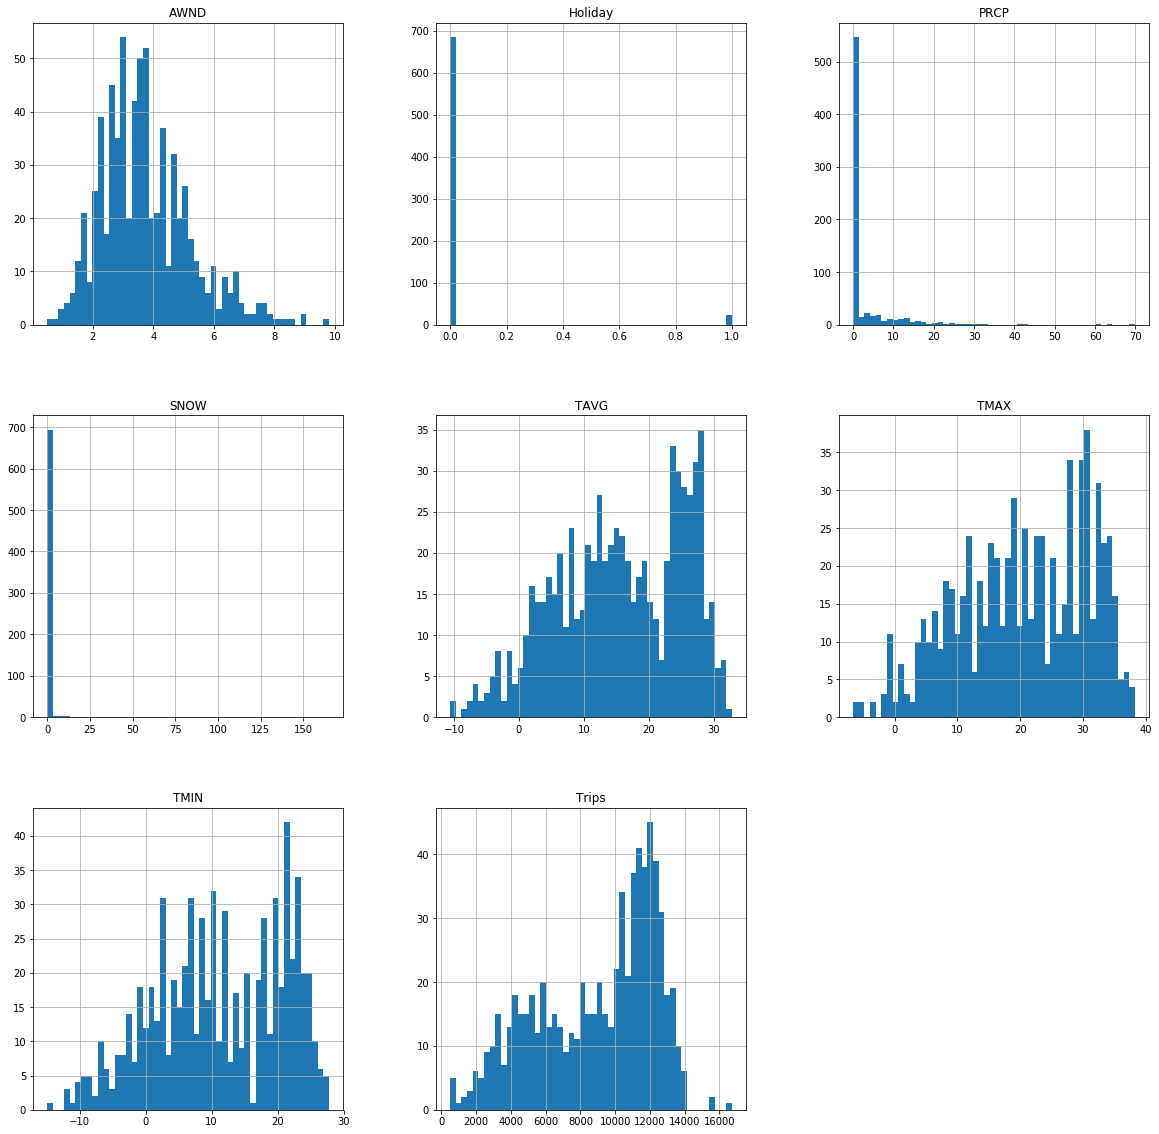

In [9]:
import matplotlib
%matplotlib inline
data.hist(bins=50, figsize=(20,20))

In [10]:
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].map(lambda x: x.month)
data["Weekday"] = data["Date"].map(lambda x: x.weekday())

In [11]:
data = data.drop(axis=1,labels="Date")

In [12]:
data.head()

,Trips,Holiday,PRCP,SNOW,TMAX,TMIN,TAVG,AWND,Month,Weekday
0,2611.0,1,0.0,0.0,8.3,-2.7,1.7,3.7,1,3
1,5155.0,0,0.0,0.0,9.4,1.7,5.3,1.3,1,4
2,1718.0,0,12.7,0.0,5.6,1.1,4.0,1.5,1,5
4,5262.0,0,0.0,0.0,11.1,-1.6,7.8,6.4,1,0
5,2086.0,0,5.1,61.0,0.0,-4.3,-1.9,2.2,1,1


In [13]:
f = open("Data/Initial_Dataset.csv","w")
f.write(data.to_csv(index=False))
f.close()